In [1]:
from autorank import autorank, create_report,plot_stats,latex_table

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv("CSV_CD/init_multi_run.csv")

In [4]:
df_raw

,run,model,dataset,r2_score,rmse,time,memory
0,1,ARFR,FriedmanGsg,0.752913,2.474894,1596.806886,564.664062
1,10,ARFR,FriedmanGsg,0.758822,2.445126,1220.318905,630.039062
2,2,ARFR,FriedmanGsg,0.743879,2.519733,1613.653707,642.226562
3,3,ARFR,FriedmanGsg,0.737437,2.551224,1392.877455,726.726562
4,4,ARFR,FriedmanGsg,0.743879,2.519733,1138.574268,702.441406
...,...,...,...,...,...,...,...
895,5,SOKNL,kin8nm,0.425226,0.199999,14.526676,1267.164062
896,6,SOKNL,kin8nm,0.418556,0.201156,13.310753,1446.039062
897,7,SOKNL,kin8nm,0.425618,0.199930,15.645060,1313.031250
898,8,SOKNL,kin8nm,0.425618,0.199930,16.837614,1330.550781


In [5]:
# only for normal result with single-run
#df = df_raw.pivot(index='dataset',columns='model',values='memory')

In [6]:
# only for normal result with multi-run
df = df_raw.pivot_table(index='dataset',columns='model',values='r2_score',aggfunc='mean')

In [7]:
df

model,ARFR,ASML_REG,ASML_REG_BEST,ASML_REG_BEST_MED,ASML_REG_MED,CHACHA,EAML_REG,HATR,SOKNL
dataset,,,,,,,,,
FriedmanGsg,0.748721,0.840446,0.766183,0.771897,0.838169,0.630790,0.661090,0.778331,0.810671
House8L,0.497471,0.533916,0.425884,0.427614,0.501564,-0.891835,0.461044,0.406551,0.529661
MetroTraffic,0.214221,0.448263,0.477295,0.474376,0.449046,-2.385044,0.111419,0.127321,0.274588
abalone,0.595105,0.616174,0.553256,0.551156,0.611020,0.456644,0.607466,0.562072,0.342929
ailerons,0.619286,0.791463,0.763302,0.756790,0.804798,0.793997,0.811933,0.766697,0.649450
bike,0.758019,0.837992,0.749046,0.760411,0.817499,0.016790,0.828760,0.743999,0.714880
elevators,0.653793,0.791575,0.790629,0.748692,0.809539,0.860235,0.726910,0.665147,0.628234
fried,0.827989,0.845736,0.773241,0.772734,0.844688,0.680022,0.770549,0.810658,0.833310
hyperA,0.938461,0.946043,0.940243,0.940335,0.945614,0.910101,0.575259,0.936388,0.830652


In [8]:
df.index.name = None
df.columns.name=None

In [9]:
df

,ARFR,ASML_REG,ASML_REG_BEST,ASML_REG_BEST_MED,ASML_REG_MED,CHACHA,EAML_REG,HATR,SOKNL
FriedmanGsg,0.748721,0.840446,0.766183,0.771897,0.838169,0.630790,0.661090,0.778331,0.810671
House8L,0.497471,0.533916,0.425884,0.427614,0.501564,-0.891835,0.461044,0.406551,0.529661
MetroTraffic,0.214221,0.448263,0.477295,0.474376,0.449046,-2.385044,0.111419,0.127321,0.274588
abalone,0.595105,0.616174,0.553256,0.551156,0.611020,0.456644,0.607466,0.562072,0.342929
ailerons,0.619286,0.791463,0.763302,0.756790,0.804798,0.793997,0.811933,0.766697,0.649450
bike,0.758019,0.837992,0.749046,0.760411,0.817499,0.016790,0.828760,0.743999,0.714880
elevators,0.653793,0.791575,0.790629,0.748692,0.809539,0.860235,0.726910,0.665147,0.628234
fried,0.827989,0.845736,0.773241,0.772734,0.844688,0.680022,0.770549,0.810658,0.833310
hyperA,0.938461,0.946043,0.940243,0.940335,0.945614,0.910101,0.575259,0.936388,0.830652
kin8nm,0.472124,0.629639,0.602278,0.594512,0.605049,0.368558,0.536634,0.306944,0.422806


In [13]:
df.columns

Index(['ARFR', 'ASML_REG', 'ASML_REG_BEST', 'ASML_REG_BEST_MED',
       'ASML_REG_MED', 'CHACHA', 'EAML_REG', 'HATR', 'SOKNL'],
      dtype='object')

In [14]:
df = df[[
    'ARFR',
    'ASML_REG',
    # 'ASML_REG_BEST',
    # 'ASML_REG_BEST_MED',
    # 'ASML_REG_MED',
    'CHACHA',
    'EAML_REG',
    'HATR',
    'SOKNL'
]]

In [15]:
import scikit_posthocs as sp

In [16]:
sp.posthoc_nemenyi_friedman(df)

,ARFR,ASML_REG,CHACHA,EAML_REG,HATR,SOKNL
ARFR,1.000000,0.090004,0.680583,0.900000,0.900000,0.9000
ASML_REG,0.090004,1.000000,0.001000,0.090004,0.010604,0.0232
CHACHA,0.680583,0.001000,1.000000,0.680583,0.900000,0.9000
EAML_REG,0.900000,0.090004,0.680583,1.000000,0.900000,0.9000
HATR,0.900000,0.010604,0.900000,0.900000,1.000000,0.9000
SOKNL,0.900000,0.023200,0.900000,0.900000,0.900000,1.0000


In [18]:
sp.posthoc_quade(df)

,ARFR,ASML_REG,CHACHA,EAML_REG,HATR,SOKNL
ARFR,1.000000,0.012170,0.021642,0.562680,0.198076,0.431863
ASML_REG,0.012170,1.000000,0.000009,0.002550,0.000300,0.001398
CHACHA,0.021642,0.000009,1.000000,0.079176,0.288965,0.119682
EAML_REG,0.562680,0.002550,0.079176,1.000000,0.473330,0.834657
HATR,0.198076,0.000300,0.288965,0.473330,1.000000,0.610320
SOKNL,0.431863,0.001398,0.119682,0.834657,0.610320,1.000000


In [42]:
test_results = sp.posthoc_nemenyi_friedman(df_raw, y_col='r2_score', block_col='dataset', group_col='model', melted=True,sort=True)

In [43]:
test_results

,ARFR,ASML_REG,ASML_REG_BEST,ASML_REG_BEST_MED,ASML_REG_MED,CHACHA,EAML_REG,HATR,SOKNL
ARFR,1.000000,0.001,0.00100,0.001000,0.001,0.001,0.124997,0.001000,0.001000
ASML_REG,0.001000,1.000,0.00100,0.001000,0.001,0.001,0.001000,0.001000,0.001000
ASML_REG_BEST,0.001000,0.001,1.00000,0.900000,0.001,0.001,0.010990,0.001000,0.001000
ASML_REG_BEST_MED,0.001000,0.001,0.90000,1.000000,0.001,0.001,0.082693,0.001000,0.001000
ASML_REG_MED,0.001000,0.001,0.00100,0.001000,1.000,0.001,0.001000,0.001000,0.001000
CHACHA,0.001000,0.001,0.00100,0.001000,0.001,1.000,0.001000,0.001000,0.001000
EAML_REG,0.124997,0.001,0.01099,0.082693,0.001,0.001,1.000000,0.001000,0.001000
HATR,0.001000,0.001,0.00100,0.001000,0.001,0.001,0.001000,1.000000,0.769661
SOKNL,0.001000,0.001,0.00100,0.001000,0.001,0.001,0.001000,0.769661,1.000000


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7fa301134ca0>)

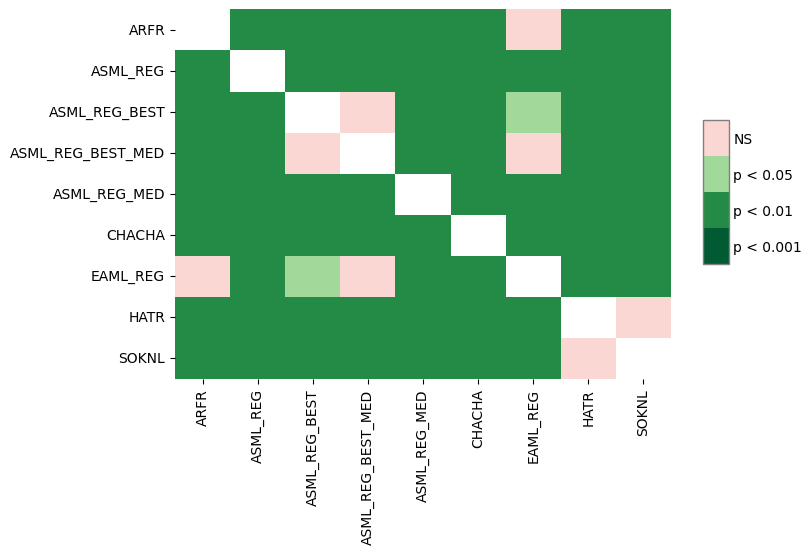

In [44]:
sp.sign_plot(test_results)

In [51]:
avg_rank = df_raw.groupby('dataset').r2_score.rank(pct=True).groupby(df_raw.model).mean()

In [52]:
avg_rank

model
ARFR                 0.431222
ASML_REG             0.853778
ASML_REG_BEST        0.517389
ASML_REG_BEST_MED    0.508722
ASML_REG_MED         0.790444
CHACHA               0.253333
EAML_REG             0.468889
HATR                 0.352111
SOKNL                0.374111
Name: r2_score, dtype: float64

{'markers': [<matplotlib.collections.PathCollection at 0x7fa30180d220>,
 'elbows': [<matplotlib.lines.Line2D at 0x7fa301801f10>,
 'labels': [Text(0.2433333333333333, -3, 'CHACHA (0.25)'),
  Text(0.2433333333333333, -4, 'HATR (0.35)'),
  Text(0.2433333333333333, -5, 'SOKNL (0.37)'),
  Text(0.2433333333333333, -6, 'ARFR (0.43)'),
  Text(0.2433333333333333, -7, 'EAML_REG (0.47)'),
  Text(0.8637777777777778, -3, '(0.85) ASML_REG'),
  Text(0.8637777777777778, -4, '(0.79) ASML_REG_MED'),
  Text(0.8637777777777778, -5, '(0.52) ASML_REG_BEST'),
  Text(0.8637777777777778, -6, '(0.51) ASML_REG_BEST_MED')],
 'crossbars': [[<matplotlib.lines.Line2D at 0x7fa3017d4370>],
  [<matplotlib.lines.Line2D at 0x7fa301801c10>]]}

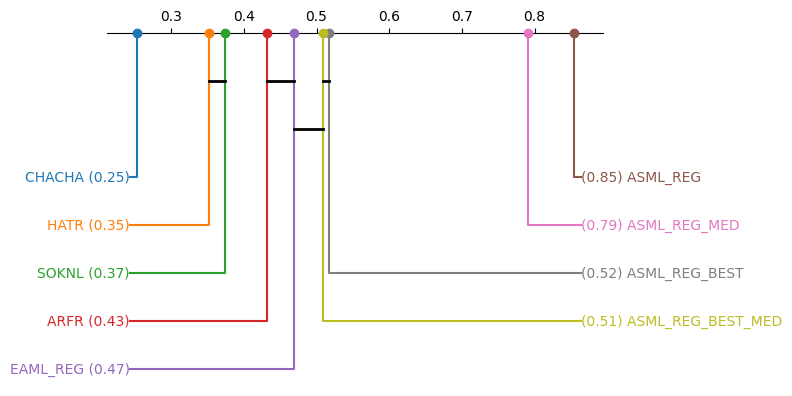

In [53]:
sp.critical_difference_diagram(avg_rank, test_results)